<a href="https://colab.research.google.com/github/NeerajKumarReddy040/UnifiedMentor-Projects/blob/main/Employee_Attrition_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import sklearn as sk


In [ ]:
data = pd.read_csv('/content/Attrition data.csv')

In [ ]:
# read the data
data.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [ ]:
# total rows and columns
data.shape

(4410, 29)

In [ ]:
# describe the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeID,4410.0,2205.500000,1273.201673,1.0,1103.25,2205.5,3307.75,4410.0
Age,4410.0,36.923810,9.133301,18.0,30.00,36.0,43.00,60.0
DistanceFromHome,4410.0,9.192517,8.105026,1.0,2.00,7.0,14.00,29.0
Education,4410.0,2.912925,1.023933,1.0,2.00,3.0,4.00,5.0
EmployeeCount,4410.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
JobLevel,4410.0,2.063946,1.106689,1.0,1.00,2.0,3.00,5.0
MonthlyIncome,4410.0,65029.312925,47068.888559,10090.0,29110.00,49190.0,83800.00,199990.0
NumCompaniesWorked,4391.0,2.694830,2.498887,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,4410.0,15.209524,3.659108,11.0,12.00,14.0,18.00,25.0
StandardHours,4410.0,8.000000,0.000000,8.0,8.00,8.0,8.00,8.0


In [ ]:
# info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   EmployeeCount            4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [ ]:
# storing all column names into a list
allcolumn = data.columns.tolist()
allcolumn

['EmployeeID',
 'Age',
 'Attrition',
 'BusinessTravel',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'Gender',
 'JobLevel',
 'JobRole',
 'MaritalStatus',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'Over18',
 'PercentSalaryHike',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'EnvironmentSatisfaction',
 'JobSatisfaction',
 'WorkLifeBalance',
 'JobInvolvement',
 'PerformanceRating']

In [ ]:
# splitting numerical data and category data
data["ageGroup"] = pd.cut(data.Age,[18,25,34,41,48,55,60], labels = ['18-25','25-34','34-41','41-48','48-55','55-60'])

In [ ]:
data_cat = data[['Attrition','ageGroup', 'BusinessTravel', 'Department', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MaritalStatus',
        'WorkLifeBalance']]

In [ ]:
data_cat.head(5)

,Attrition,ageGroup,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,WorkLifeBalance
0,No,48-55,Travel_Rarely,Sales,Life Sciences,3.0,Female,3,1,4.0,Married,2.0
1,Yes,25-34,Travel_Frequently,Research & Development,Life Sciences,3.0,Female,2,1,2.0,Single,4.0
2,No,25-34,Travel_Frequently,Research & Development,Other,2.0,Male,3,4,2.0,Married,1.0
3,No,34-41,Non-Travel,Research & Development,Life Sciences,4.0,Male,2,3,4.0,Married,3.0
4,No,25-34,Travel_Rarely,Research & Development,Medical,4.0,Male,3,1,1.0,Single,3.0


In [ ]:
#Numerical Features
data_num = data[['Attrition','MonthlyIncome','TotalWorkingYears', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'DistanceFromHome' ]]
data_num.sample(5)

,Attrition,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
2011,No,60320,23.0,22,13,7,11
3456,No,75470,31.0,9,6,2,2
4164,No,39750,5.0,5,4,3,2
4319,No,174260,12.0,10,7,4,1
2913,No,34450,22.0,22,11,15,7


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt
#for high resoultion graphs
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
#for ignoring warnings
import warnings
warnings.filterwarnings("ignore")

<ipython-input-18-36ac17a88684>:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


In [ ]:
#Attrition proportion - Using Doughnut chart
Y_count = len(data[data['Attrition'] == 1])
N_count = len(data[data['Attrition'] == 0])
# create data
names='Yes', 'No',
size=[Y_count,N_count]


In [ ]:
# Create a circle for the center of the plot
circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['Red','Gold'])
p=plt.gcf()
p.gca().add_artist(circle)
ax = plt.axes()
ax.set_title("Attrition Proportion")
plt.show()

ValueError: cannot convert float NaN to integer

ValueError: need at least one array to concatenate

<Figure size 640x480 with 1 Axes>



Graphs for Attrition:
Total_no. of categories:2


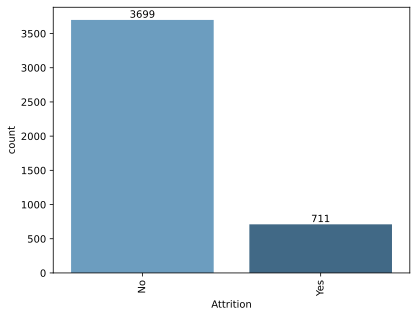



Graphs for ageGroup:
Total_no. of categories:6


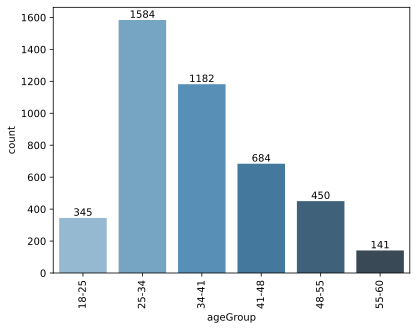



Graphs for BusinessTravel:
Total_no. of categories:3


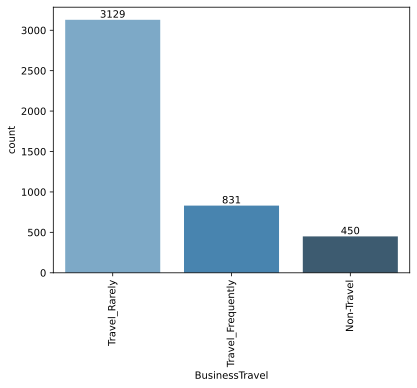



Graphs for Department:
Total_no. of categories:3


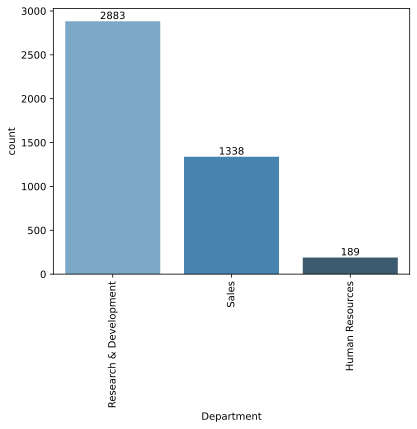



Graphs for EducationField:
Total_no. of categories:6


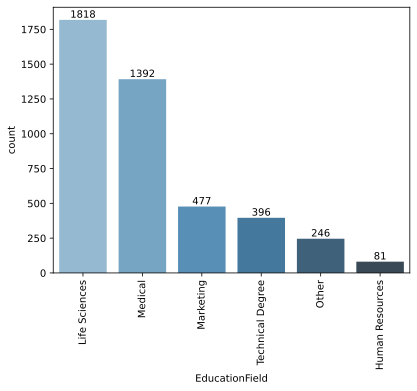



Graphs for EnvironmentSatisfaction:
Total_no. of categories:4


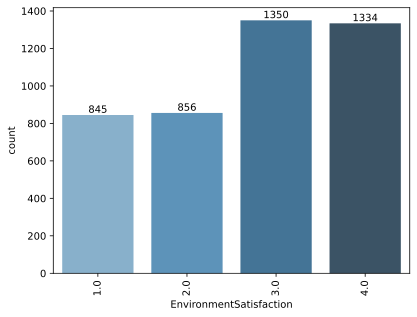



Graphs for Gender:
Total_no. of categories:2


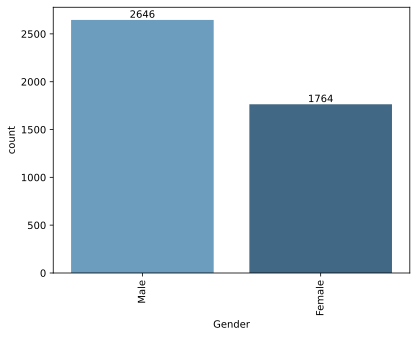



Graphs for JobInvolvement:
Total_no. of categories:4


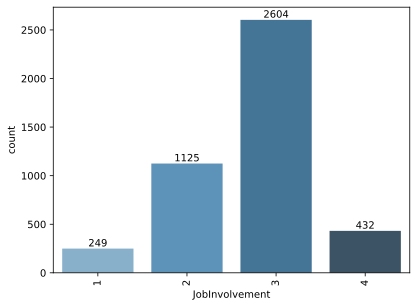



Graphs for JobLevel:
Total_no. of categories:5


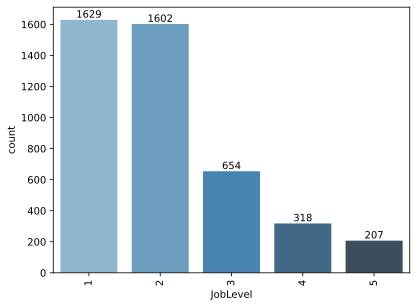



Graphs for JobSatisfaction:
Total_no. of categories:4


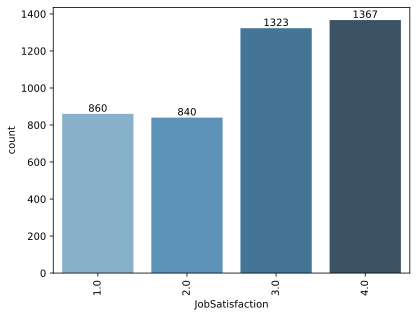



Graphs for MaritalStatus:
Total_no. of categories:3


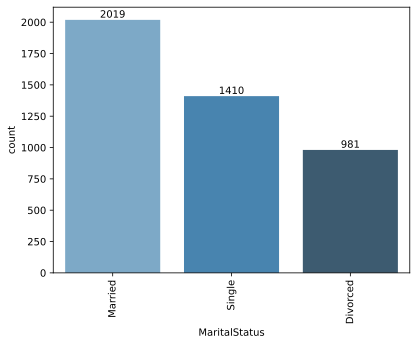



Graphs for WorkLifeBalance:
Total_no. of categories:4


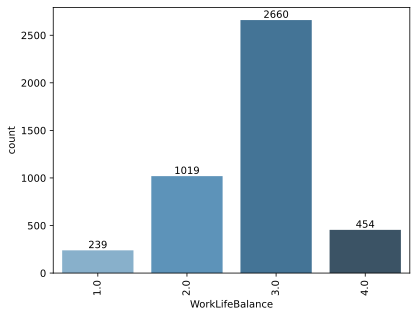

In [ ]:
# Bar Plot

for i in data_cat:
    cat_num = data_cat[i].value_counts()
    print("\n\nGraphs for %s:\nTotal_no. of categories:%d" %(i, len(cat_num)))
    chart = sns.barplot(x= cat_num.index, y= cat_num, palette="Blues_d")
    chart.set_xticklabels(chart.get_xticklabels(),rotation = 90)   #rotating labels for better readability
    for bar in chart.patches:  #adding annotation to the graphs
      chart.annotate(format(bar.get_height(), '.0f'),
      (bar.get_x() + bar.get_width() / 2., bar.get_height()),
       ha = 'center', va = 'center',
       xytext = (0, 5),
       textcoords = 'offset points')
    plt.show()

Graphs for Attrition:
Minimum value of Attrition is: No
Maximum value of Attrition is: Yes




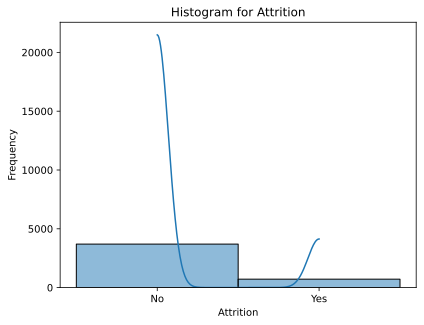

Graphs for MonthlyIncome:
Minimum value of MonthlyIncome is: 10090
Maximum value of MonthlyIncome is: 199990




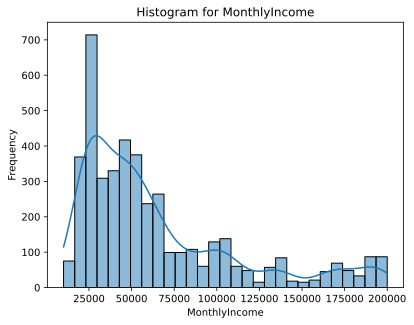

Graphs for TotalWorkingYears:
Minimum value of TotalWorkingYears is: 0.0
Maximum value of TotalWorkingYears is: 40.0




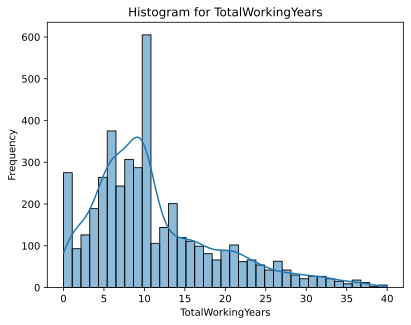

Graphs for YearsAtCompany:
Minimum value of YearsAtCompany is: 0
Maximum value of YearsAtCompany is: 40




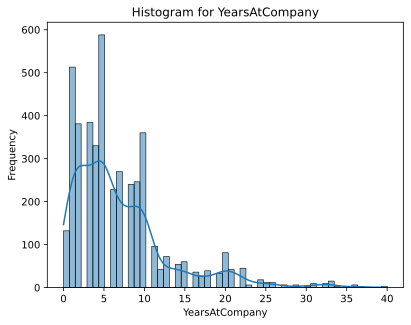

Graphs for YearsSinceLastPromotion:
Minimum value of YearsSinceLastPromotion is: 0
Maximum value of YearsSinceLastPromotion is: 15




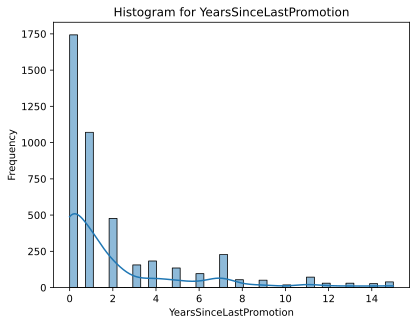

Graphs for YearsWithCurrManager:
Minimum value of YearsWithCurrManager is: 0
Maximum value of YearsWithCurrManager is: 17




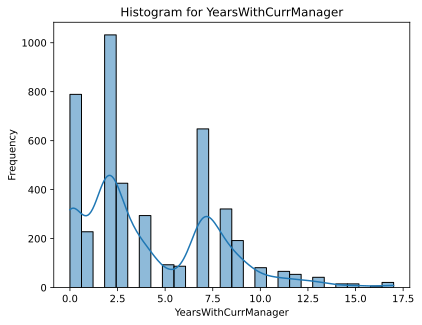

Graphs for DistanceFromHome:
Minimum value of DistanceFromHome is: 1
Maximum value of DistanceFromHome is: 29




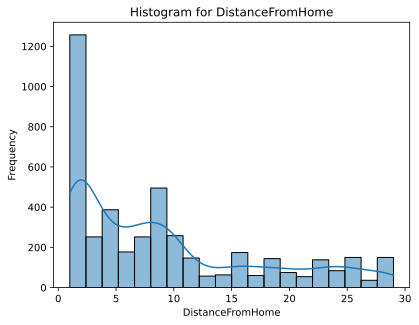

In [ ]:
# Histogram Charts and Skew


for i in data_num.columns:
    min_val = data_num[i].min()
    max_val = data_num[i].max()
    print("Graphs for %s:\nMinimum value of %s is: %s\nMaximum value of %s is: %s\n\n" % (i, i, str(min_val), i, str(max_val)))
    sns.histplot(data_num[i], kde=True)
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.title('Histogram for ' + i)
    plt.show()